In [2]:
# NB settings
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [3]:
# Settings
import pandas as pd
import numpy as np
import scipy as sci
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.style.use(['bmh','seaborn-white'])
import seaborn as sns

pd.set_option('display.width', 1200)
np.set_printoptions(linewidth=1200)
pd.set_option('display.max_columns',50)
pd.set_option('display.max_rows',100)

# Welcome to the second session

**Today:** 
methods that will help you in the case study and a Q&A

| | |
|:--------------|:-----------------------------|
|10:00 to 11:15 | Theory and Application Part 1|
|11:15 to 11:20 | Break|
|11:20 to 12:30 | Theory and Application Part 2|
|12:30 to 13:00 | Break|
|13:00 to 14:00 | Q&A with BTV's RMF|
|14:00 to 14:45 | Theory and Application Part 3|
|14:45 to 15:00 | Break|
|15:00 to 16:00 | Theory and Application Part 4 |

## Recap

* **First look on your case study dataset and description of the task**

* **Loading a dataset**
    + Always check if successfull
    + Data types
    + Missing values
    
* **Get an overview over your dataset**
    * Revision of general data types
        + boolean / dummy / dichotomous 
        + ordinal / categorical (unordered / ordered)
        + interval scaled / numerical
    * For categorical variables - check the size of the individual groups as well (merging groups)
    
* **Correlations, Histogram, Boxplots and data transformations**
    + e.g. use log transformation if the variable allows it
    + split the groups by the observed variable of interest (default) -> are there differences in the distribution of the feature?
    + trust aspects that you can visualize and which make sense from an economic perspective    
    
* **OLS vs. GLM (Logit) Regressions**
* **GINI / AUC measure**

## Content

<h1>Theoretical and Applied Part<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Welcome-to-the-second-session" data-toc-modified-id="Welcome-to-the-second-session-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Welcome to the second session</a></span><ul class="toc-item"><li><span><a href="#Recap" data-toc-modified-id="Recap-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Recap</a></span></li><li><span><a href="#Content" data-toc-modified-id="Content-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Content</a></span></li></ul></li><li><span><a href="#Theoretical-aspects" data-toc-modified-id="Theoretical-aspects-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Theoretical aspects</a></span><ul class="toc-item"><li><span><a href="#Missing-values-/-NA" data-toc-modified-id="Missing-values-/-NA-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Missing values / NA</a></span><ul class="toc-item"><li><span><a href="#Three-Concepts-about-missingness" data-toc-modified-id="Three-Concepts-about-missingness-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Three Concepts about missingness</a></span></li><li><span><a href="#Handling-missing-values" data-toc-modified-id="Handling-missing-values-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Handling missing values</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Dealing-with-outliers" data-toc-modified-id="Dealing-with-outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dealing with outliers</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Adjusting-the-training-error" data-toc-modified-id="Adjusting-the-training-error-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Adjusting the training error</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Summary-on-&quot;adjusting-the-training-error&quot;" data-toc-modified-id="Summary-on-&quot;adjusting-the-training-error&quot;-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>Summary on "adjusting the training error"</a></span></li></ul></li><li><span><a href="#Cross-Validation-approach-(Resampling-methods)" data-toc-modified-id="Cross-Validation-approach-(Resampling-methods)-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Cross-Validation approach (Resampling methods)</a></span><ul class="toc-item"><li><span><a href="#Validation-Set-Approach" data-toc-modified-id="Validation-Set-Approach-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Validation Set Approach</a></span></li><li><span><a href="#Leave-1-Out-Cross-Validation-Approach" data-toc-modified-id="Leave-1-Out-Cross-Validation-Approach-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Leave-1-Out Cross-Validation Approach</a></span></li><li><span><a href="#Leave-K-Out-Cross-Validation-Approach" data-toc-modified-id="Leave-K-Out-Cross-Validation-Approach-2.3.2.3"><span class="toc-item-num">2.3.2.3&nbsp;&nbsp;</span>Leave-K-Out Cross-Validation Approach</a></span></li><li><span><a href="#K-Fold-Approach" data-toc-modified-id="K-Fold-Approach-2.3.2.4"><span class="toc-item-num">2.3.2.4&nbsp;&nbsp;</span>K-Fold Approach</a></span></li><li><span><a href="#Repeated-K-Fold-Approach" data-toc-modified-id="Repeated-K-Fold-Approach-2.3.2.5"><span class="toc-item-num">2.3.2.5&nbsp;&nbsp;</span>Repeated K-Fold Approach</a></span></li><li><span><a href="#Stratified-version-of-the-K-Fold-approach" data-toc-modified-id="Stratified-version-of-the-K-Fold-approach-2.3.2.6"><span class="toc-item-num">2.3.2.6&nbsp;&nbsp;</span>Stratified version of the K-Fold approach</a></span></li><li><span><a href="#Example:-K-Fold-approach" data-toc-modified-id="Example:-K-Fold-approach-2.3.2.7"><span class="toc-item-num">2.3.2.7&nbsp;&nbsp;</span>Example: K-Fold approach</a></span></li></ul></li></ul></li><li><span><a href="#Overfitting-and-Feature-selection" data-toc-modified-id="Overfitting-and-Feature-selection-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Overfitting and Feature selection</a></span><ul class="toc-item"><li><span><a href="#A-word-of-warning" data-toc-modified-id="A-word-of-warning-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>A word of warning</a></span></li><li><span><a href="#Example:-A-small-tree" data-toc-modified-id="Example:-A-small-tree-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Example: A small tree</a></span><ul class="toc-item"><li><span><a href="#The-tree-in-a-figure" data-toc-modified-id="The-tree-in-a-figure-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>The tree in a figure</a></span></li><li><span><a href="#The-tree-exported-as-a-text" data-toc-modified-id="The-tree-exported-as-a-text-2.4.2.2"><span class="toc-item-num">2.4.2.2&nbsp;&nbsp;</span>The tree exported as a text</a></span></li><li><span><a href="#Variable-importance-visualized" data-toc-modified-id="Variable-importance-visualized-2.4.2.3"><span class="toc-item-num">2.4.2.3&nbsp;&nbsp;</span>Variable importance visualized</a></span></li><li><span><a href="#Gini-and-AUC-of-the-tree" data-toc-modified-id="Gini-and-AUC-of-the-tree-2.4.2.4"><span class="toc-item-num">2.4.2.4&nbsp;&nbsp;</span>Gini and AUC of the tree</a></span></li></ul></li></ul></li><li><span><a href="#Other-suitable-methods-you-can-use-in-your-case-study" data-toc-modified-id="Other-suitable-methods-you-can-use-in-your-case-study-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Other suitable methods you can use in your case study</a></span></li></ul></li><li><span><a href="#The-case-study-(break-out-rooms)" data-toc-modified-id="The-case-study-(break-out-rooms)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The case study (break out rooms)</a></span></li></ul></div>

# Theoretical aspects

## Missing values / NA

### Three Concepts about missingness

**Missing completely at random (MCAR)**
* missing values occur entirely at random.
* no relationship between whether a data point is missing and any values in the data set, missing or observed.
* hence, the missing data are just a random subset of the data.

**Missing at random (MAR)**
* does not mean that it is random!
* missing at random means  the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
* hence, the relationship with the other variables can be used to get an estimate of the value that is missing

**Missing not at random (MNAR)**
* neither MAR nor MCAR
* the value of the variable that's missing is related to the reason it's missing

### Handling missing values

**If the data are missing completely at random, you could in general**
* in (financial-) econometrics, missing observations are often simply discarded for estimation purposes. 
* nevertheless, if you want to use a variable as a feature in your model in our case, be sure that no observation is missing in test sample such that the model generates the expected output and not NA values.
* of course, if your model can have NAs as an output (estimated PDs) as well - you can impute them as well - but but which value should you use? The same question remains

**Imputing**

What can you do?
* Identities exists that can be used to calculate the value (MNAR)
* You could use for example measures of central tendencies (mean, median, mode, ...) as well (only if MCAR)
* You could exploit a relationship
 + e.g. a suitable model $m$ to predict $E[y_i \; | \; \boldsymbol{x}_i]$, where $y_i$ denotes the missing value to be imputed and $\boldsymbol{x}_i$ the vector of observed features that are related to $y_i$. 
 + the suitable model $m$ could be the mean / median of a group, a regression model, etc.
* For categorical variables: you can make group a group of "Unknowns" or you can create categorical variables from numerical variables ...

**Question:** 
At what project stage should you tackle missing values?

### Example

In [4]:
# Load file
path = 'C:/Users/schmi/OneDrive/Uni/Teaching/Applied_RM/Project/Files/'

train = pd.read_csv(path+'Data4Students/Training_Dataset.csv', sep=';', 
                    dtype={'zip_code':str,
                           'sector':str,
                           'default':bool}).set_index('id')

train['defn'] = train.default.astype(np.float)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, C_405 to C_864
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   default                  669 non-null    bool   
 1   legal_form               669 non-null    object 
 2   zip_code                 669 non-null    object 
 3   sector                   669 non-null    object 
 4   year_inc                 669 non-null    int64  
 5   count_emp                316 non-null    float64
 6   type_pl                  669 non-null    object 
 7   sales                    668 non-null    float64
 8   gross_performance        662 non-null    float64
 9   gross_profit             662 non-null    float64
 10  earn_from_op             668 non-null    float64
 11  fin_result               647 non-null    float64
 12  oth_interest_inc         542 non-null    float64
 13  oth_interest_exp         607 non-null    float64
 14  result_from_ord_bus      

In [6]:
train.head(10)

,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,fin_result,oth_interest_inc,oth_interest_exp,result_from_ord_bus,total_result,annual_profit,total_assets,total_liabilities_st,total_liabilities_mt,total_liabilities_lt,bank_liabilities_st,bank_liabilities_mt,bank_liabilities_lt,trade_payables_st,trade_payables_mt,trade_payables_lt,bonds_payables_st,bonds_payables_mt,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,defn
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C_405,False,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,3.859361e+07,6.536078e+06,1.345910e+06,47945.82,423412.24,7.881988e+06,7.881988e+06,6.522577e+06,4.365848e+07,7.356606e+06,3.752194e+06,2.556459e+05,NaN,NaN,NaN,4120064.34,NaN,NaN,NaN,NaN,NaN,3.224471e+07,3.783199e+07,1.711147e+07,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09,0.0
C_292,False,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,1.539841e+06,3.814091e+04,1.072010e+06,9934.29,4372.31,1.110150e+06,1.106813e+06,1.116985e+06,1.156799e+07,7.034964e+06,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.508026e+06,4.669179e+06,9.278377e+05,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08,0.0
C_746,False,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,1.500839e+07,8.979980e+04,2.983440e+03,2983.44,NaN,9.278324e+04,9.278324e+04,-1.400000e-09,5.511145e+07,8.443592e+06,1.401615e+04,0.000000e+00,NaN,NaN,NaN,5348013.09,NaN,NaN,NaN,NaN,NaN,5.164048e+04,2.810119e+07,1.111696e+07,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07,0.0
C_838,False,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,3.293227e+07,5.843150e+05,2.235095e+04,24560.96,2210.01,6.066660e+05,6.066660e+05,5.946089e+05,1.994848e+07,2.579710e+06,8.160722e+04,1.319019e+05,25391.33,4.560722e+04,NaN,480218.47,NaN,NaN,NaN,NaN,NaN,1.182011e+07,8.238474e+06,7.519183e+06,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66,0.0
C_495,False,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,1.254550e+08,5.403381e+07,-1.029321e+07,62152.95,10641194.38,4.374060e+07,4.374060e+07,2.840600e+07,1.089218e+09,3.475160e+08,1.647352e+08,9.222217e+07,37432969.20,1.381920e+08,9.222217e+07,13968005.91,NaN,NaN,NaN,NaN,NaN,4.547445e+08,3.546565e+07,8.545184e+06,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80,0.0
C_494,False,GmbH,13055,68201,1990,415.0,GKV,4.518042e+04,4.518042e+04,4.847705e+04,2.238291e+04,1.476500e+02,NaN,2.77,2.253056e+04,2.253056e+04,1.552286e+04,8.519500e+04,5.661130e+03,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.953387e+04,8.484770e+04,8.061511e+04,75679.79,NaN,NaN,1.800497e+04,-3.787100e+02,0.00,0.0
C_300,False,GmbH,10969,68200,1991,2.0,GKV,1.508435e+08,1.479894e+08,1.076359e+08,4.729300e+07,-6.693591e+06,73961.45,11414398.77,4.059941e+07,4.059941e+07,2.946995e+07,1.026295e+09,1.016720e+08,1.087618e+08,1.501236e+08,26577708.38,1.086147e+08,1.501236e+08,2949596.57,147121.35,NaN,NaN,NaN,NaN,6.657375e+08,8.479909e+07,3.142807e+07,11542490.91,326731.07,8000.0,4.007555e+07,-8.337054e+06,-34594274.52,0.0
C_453,False,GmbH,16792,78100,1991,NaN,GKV,2.843420e+08,2.843420e+08,4.233500e+07,-1.340470e+08,8.108910e+08,891000.00,15925000.00,6.768440e+08,6.768440e+08,6.342260e+08,3.202392e+09,2.851710e+08,5.035000e+05,0.000000e+00,382000.00,NaN,NaN,6790000.00,NaN,NaN,NaN,NaN,NaN,2.883814e+09,4.229090e+08,4.312550e+08,21696000.00,448000.00,NaN,5.861770e+08,-7.339750e+08,-95826000.00,0.0
C_924,False,GmbH,13125,86101,1991,283.0,GKV,9.811591e+06,9.681040e+06,6.110980e+06,3.785872e+06,-3.041576e+06,158111.31,3199687.45,7.442963e+05,7.442963e+05,1.050000e-09,9.546664e+07,1.866104e+07,4.262100e+07,1.385492e+07,14820000.00,4.175000e+07,9.061443e+06,229715.96,NaN,NaN,NaN,NaN,NaN,2.032968e+07,7.366730e+06,5.421665e+06,322573.88,372298.68,NaN,4.369386e+05,-1.879

Missing values in the dataset to train the model

In [7]:
pd.DataFrame({'Valid': train.notnull().sum(), 
              'NAs': train.isnull().sum(), 
              'NAs of total': train.isnull().sum() / train.shape[0]}
            ).sort_values('NAs of total', ascending=False)

,Valid,NAs,NAs of total
bonds_payables_lt,0,669,1.000000
bonds_payables_st,0,669,1.000000
trade_payables_lt,4,665,0.994021
bonds_payables_mt,5,664,0.992526
trade_payables_mt,21,648,0.968610
trade_receivables_lt,24,645,0.964126
bank_liabilities_lt,124,545,0.814649
bank_liabilities_mt,186,483,0.721973
trade_receivables_st,314,355,0.530643
count_emp,316,353,0.527653


**Question**

About 53 % of all companies in the training dataset have the number of employee count not available. What can you do, if you want check whether the missingness is related to defaults

In [73]:
tbl = train.assign(IsMissing = lambda x: x.count_emp.isnull()).groupby('IsMissing').default.describe()
tbl['Def'] = tbl['count'] - tbl['freq']
tbl['Avg'] = tbl['Def'] / tbl['count']
tbl

,count,unique,top,freq,Def,Avg
IsMissing,,,,,,
False,316,2,False,301,15,0.0474684
True,353,2,False,330,23,0.0651558


**Question**

Is the difference statistical significant?

In [74]:
mdl = sm.Logit.from_formula('defn ~ IsMissing + 1', 
                            data=train.assign(IsMissing = lambda x: x.count_emp.isnull())
                           ).fit(disp=False, maxiter=100)
print(mdl.summary2())

                          Results: Logit
Model:               Logit             Pseudo R-squared:  0.003   
Dependent Variable:  defn              AIC:               294.7998
Date:                2020-11-28 09:06  BIC:               303.8113
No. Observations:    669               Log-Likelihood:    -145.40 
Df Model:            1                 LL-Null:           -145.89 
Df Residuals:        667               LLR p-value:       0.32152 
Converged:           1.0000            Scale:             1.0000  
No. Iterations:      7.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept         -2.9991   0.2646 -11.3363 0.0000 -3.5176 -2.4805
IsMissing[T.True]  0.3355   0.3413   0.9828 0.3257 -0.3335  1.0044



In [75]:
print(mdl.get_margeff(dummy=True).summary())

        Logit Marginal Effects       
Dep. Variable:                   defn
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
IsMissing[T.True]     0.0177      0.018      0.996      0.319      -0.017       0.053


*or a binomial test*

In [8]:
res = train.assign(IsMissing = lambda x: x.count_emp.isnull())
res = res.groupby("IsMissing").default.agg(["count","sum","mean"]).sort_values("count", ascending=False)
res["CI_Low"]  = np.nan
res["CI_High"] = np.nan

for i in list(res.index):
    p = res.loc[i, 'mean']
    res.loc[i, "CI_Low"] = sci.stats.binom.ppf(0.05, res['count'].loc[i], p)
    res.loc[i, "CI_High"] = sci.stats.binom.ppf(0.95, res['count'].loc[i], p)
res.sort_values("mean", ascending=False)

,count,sum,mean,CI_Low,CI_High
IsMissing,,,,,
True,353,23,0.065156,16.0,31.0
False,316,15,0.047468,9.0,21.0


**Question**

How could you impute the missing values?

*a) ordered categorical variable*

*b) by using another variable*

**a)** 
Transforming the number of employees into an ordered categorical variable, for example:

In [9]:
train['eg_count_emp'] = np.select(
    [train['count_emp'].between(1, 49, inclusive=True),
     train['count_emp'].between(50, 199, inclusive=True),
     train['count_emp'].between(200, np.inf, inclusive=True)], 
    ['Small', 'Medium', 'Large'], default='Unknown'
)

which looks like the following in your dataset

In [11]:
train[['count_emp', 'eg_count_emp']]

,count_emp,eg_count_emp
id,,
C_405,NaN,Unknown
C_292,NaN,Unknown
C_746,323.0,Large
C_838,1.0,Small
C_495,NaN,Unknown
...,...,...
C_637,NaN,Unknown
C_091,64.0,Medium
C_707,NaN,Unknown


How large are the bins?

In [14]:
train['eg_count_emp'].value_counts()

Unknown    353
Medium     121
Small      111
Large       84
Name: eg_count_emp, dtype: int64

In [17]:
train.groupby('eg_count_emp').defn.mean()

eg_count_emp
Large      0.071429
Medium     0.057851
Small      0.018018
Unknown    0.065156
Name: defn, dtype: float64

In [18]:
train.defn.mean()

0.05680119581464873

Is there a statical significance result?

In [15]:
mdl = sm.Logit.from_formula('defn ~ eg_count_emp + 1', data=train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                            Results: Logit
Model:                  Logit              Pseudo R-squared:   0.017   
Dependent Variable:     defn               AIC:                294.8367
Date:                   2020-11-28 11:04   BIC:                312.8598
No. Observations:       669                Log-Likelihood:     -143.42 
Df Model:               3                  LL-Null:            -145.89 
Df Residuals:           665                LLR p-value:        0.17581 
Converged:              1.0000             Scale:              1.0000  
No. Iterations:         8.0000                                         
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -2.5649   0.4237 -6.0543 0.0000 -3.3953 -1.7346
eg_count_emp[T.Medium]  -0.2253   0.5754 -0.3916 0.6954 -1.3532  0.9025
eg_count_emp[T.Small]

In [16]:
print(mdl.get_margeff(dummy=True).summary())

        Logit Marginal Effects       
Dep. Variable:                   defn
Method:                          dydx
At:                           overall
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
eg_count_emp[T.Medium]     -0.0113      0.027     -0.415      0.678      -0.065       0.042
eg_count_emp[T.Small]      -0.0492      0.018     -2.691      0.007      -0.085      -0.013
eg_count_emp[T.Unknown]    -0.0053      0.026     -0.205      0.837      -0.056       0.045


**b)** Count of employees and other variables with respect to size?

In [82]:
np.log(train[['count_emp', 'sales', 'total_assets']].dropna()).corr()

,count_emp,sales,total_assets
count_emp,1.000000,-0.06118,-0.124512
sales,-0.061180,1.00000,0.793360
total_assets,-0.124512,0.79336,1.000000


In [21]:
mdl = sm.OLS.from_formula('np.log(count_emp) ~ np.log(total_assets) + 1', data=train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                  Results: Ordinary least squares
Model:               OLS               Adj. R-squared:     0.012    
Dependent Variable:  np.log(count_emp) AIC:                1215.0009
Date:                2020-11-28 11:36  BIC:                1222.5061
No. Observations:    315               Log-Likelihood:     -605.50  
Df Model:            1                 F-statistic:        4.929    
Df Residuals:        313               Prob (F-statistic): 0.0271   
R-squared:           0.016             Scale:              2.7537   
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept             5.7227   0.6247  9.1606 0.0000  4.4936  6.9519
np.log(total_assets) -0.0903   0.0407 -2.2201 0.0271 -0.1704 -0.0103
--------------------------------------------------------------------
Omnibus:                4.303         Durbin-Watson: 

In [22]:
train['count_emp_hat'] = np.exp(mdl.predict(exog=train.total_assets)).round(0)
train['count_emp_imp'] = train['count_emp'].fillna(train['count_emp_hat'])
tmp = train[['count_emp', 'count_emp_hat','count_emp_imp']]
tmp.head(10)

,count_emp,count_emp_hat,count_emp_imp
id,,,
C_405,NaN,62.0,62.0
C_292,NaN,70.0,70.0
C_746,323.0,61.0,323.0
C_838,1.0,67.0,1.0
C_495,NaN,47.0,47.0
C_494,415.0,110.0,415.0
C_300,2.0,47.0,2.0
C_453,NaN,42.0,42.0
C_924,283.0,58.0,283.0


<AxesSubplot:xlabel='count_emp', ylabel='count_emp_hat'>

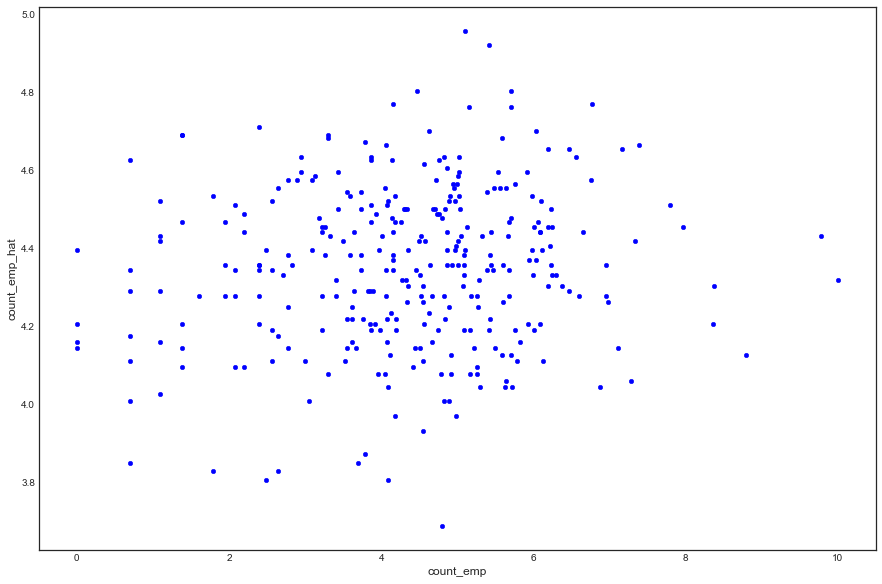

In [23]:
np.log(tmp).plot(kind='scatter',x = 'count_emp', y='count_emp_hat', figsize=(15,10))

## Dealing with outliers

**What are outliers**
* if an observed value is an outlier or not is not strictly defined and needs the judgement of the analyst - hence it is subjective
* first, the dimension you are dealing with is important to interpret what an outlier is:

**one-dimensional situation**
* loosely defined as values that are "unusually large" or "unusually small"
* but what means unusually?
 
**higher-dimensional cases**
* outliers are points "don't fit the general pattern" of the other data.

**What to do?**
* Outliers can cause severe problems for your analysis and you should deal with them

*Deleting outliers / Trimming*
 - never appropriate simply because they meet your definition of outliers
 - it is only a valid approach if you are sure that they represent some type of error (e.g. selected from a non-relevant population, severe data error that you cannot be fixed) that will distort your analysis.

*Winsorizing*
* describes the process of limiting extreme values to reduce the effect of possibly spurious outliers (censoring)
* hence, you limit the identified outliers to an acceptable level, e.g. by setting the extreme value to a given number or to a value of a given quantile of your data
* don't mix it up with trimming / truncation!
* Hint: Always think about reasonable minimal and maximal values of your variable - which will make sense? 

*Transformations*
* there are some techniques which reshape the complete distribution of your data and hence deal with extreme values
* e.g. quantile transformation or power transformation
* nevertheless, if there are linear dependencies between some variables, those will be distorted by such transformations!

**Question**

Histogram and boxplots are shown for two variables, $x$ and $y$. Can you identify the outliers? 

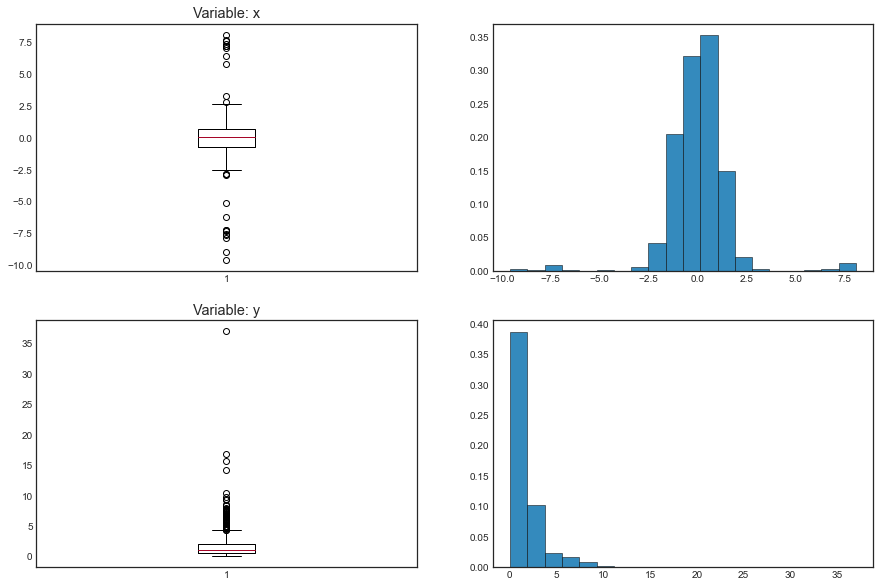

                x           y
count  669.000000  669.000000
mean     0.024506    1.763631
std      1.602747    2.367343
min     -9.575212    0.058351
25%     -0.689125    0.542968
50%      0.089919    1.076452
75%      0.702509    2.050167
max      8.088302   36.978927


In [86]:
x1 = np.random.normal(size=649)
x2 = np.random.normal(size=10, loc=7)
x3 = np.random.normal(size=10, loc=-7)
x = np.concatenate([x1, x2, x3])
y = np.random.lognormal(size=669)

f, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0, 0].boxplot(x)
ax[0, 0].set_title('Variable: x')
ax[0, 1].hist(x, bins=20, density=True, edgecolor='black')

ax[1, 0].boxplot(y)
ax[1, 0].set_title('Variable: y')
ax[1, 1].hist(y, bins=20, density=True, edgecolor='black')
plt.show()

print(pd.DataFrame({'x':x, 'y':y}).describe())

**How can you deal with $x$?**

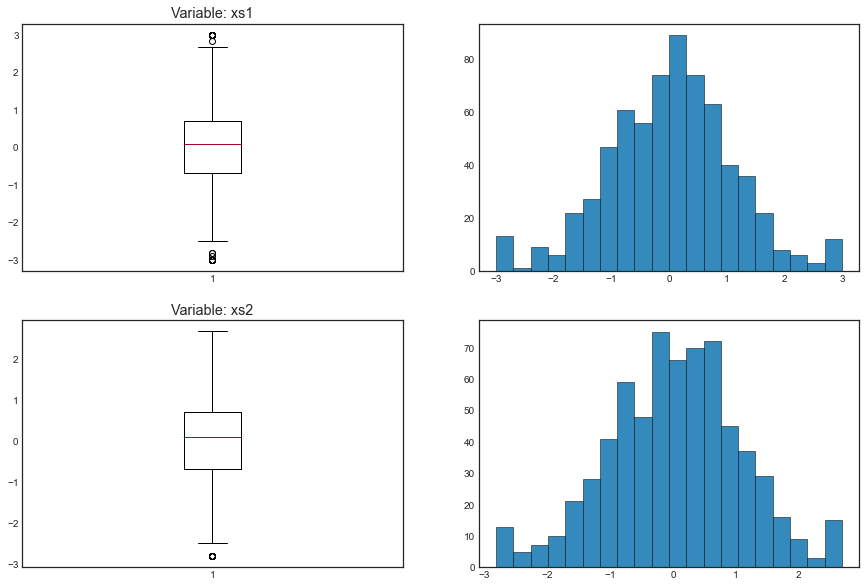

In [87]:
xs = x.copy()
xs[xs > 3] = 3
xs[xs < -3] = -3

xs2 = sci.stats.mstats.winsorize(x, limits = 0.018)

f, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0,0].boxplot(xs)
ax[0,0].set_title('Variable: xs1')
ax[0,1].hist(xs, bins=20, edgecolor='black')

ax[1,0].boxplot(xs2)
ax[1,0].set_title('Variable: xs2')
ax[1,1].hist(xs2, bins=20, edgecolor='black');

**How can you deal with $y$?**

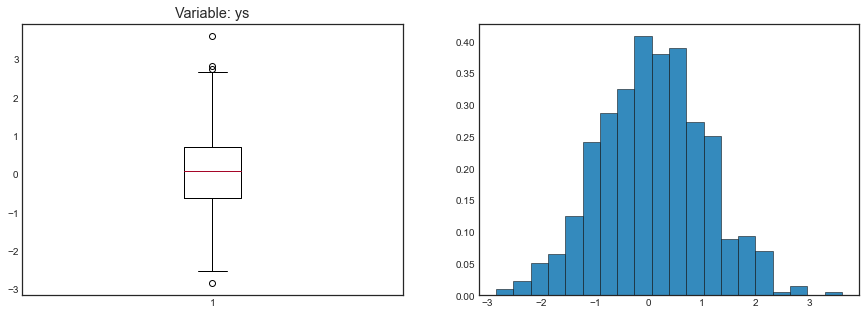

In [88]:
ys = np.log(y)

f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].boxplot(ys)
ax[0].set_title('Variable: ys')
ax[1].hist(ys, bins=20, density=True, edgecolor='black');

## Model Selection

Suppose you have identified a number of different variables that you may want to include in different models. Let $V$ be the set of all variables you consider. All possible combination of the variables in $V$ are in the power set $\mathcal{P}(V)$, which includes the empty set (in that case the null model - the mean) as well as $V$ itself. How can you judge which model will probably performs best out-of-sample by assessing the model performance only with your available sample? 

Obviously, you could choose the full model $V$ - which is probably the model producing the highest $AUC$ in-sample. Nevertheless, will it perform well out-of-sample?

There are two approaches used often in machine learning, called:

* adjusting the training error and
* the cross-validation approach and the application of bootstrapping

### Adjusting the training error

#### Example

Let 
\begin{equation*}
y_i = 10 + 3x_i - 1.5z_i + \epsilon_i
\end{equation*}

and let's say you have additional data represented by the matrix $\boldsymbol{K}_{N\times7}$. Can you simply include $\boldsymbol{K}$? All variables in $\boldsymbol{K}$ are independent to each other as well as with $\boldsymbol{x}$, $\boldsymbol{z}$ and $\boldsymbol{y}$.

What are your expectations when running two regression:

1. $y$ on $x$ and $z$ 

2. $y$ on $x$ and $z$ as well as all $k$

In [25]:
def generate_sample(N, seed):
    np.random.seed(seed)
    eps = np.random.normal(0,5,N)
    x = np.random.normal(10,3,N)
    z = np.random.normal(8,5,N)
    y = 10 + 3*x - 1.5*z + eps
    K = np.random.normal(0,10,size=(N,7))

    temp1 = pd.DataFrame({'y':y, 'x':x, 'z':z})
    temp2 = pd.DataFrame(K)
    temp2.columns = ['k'+str(i) for i in range(1,8)]
    return pd.concat([temp1, temp2], axis=1)
    
    
data = generate_sample(500, 99)

mdl1 = sm.OLS.from_formula('y ~ x + z + 1', data=data).fit()
mdl2 = sm.OLS.from_formula('y ~ x + z + k1 + k2 + k3 + k4 + k5 + k6 + k7 + 1', data=data).fit()

In [90]:
print(mdl1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.857    
Dependent Variable: y                AIC:                3017.8887
Date:               2020-11-28 09:07 BIC:                3030.5325
No. Observations:   500              Log-Likelihood:     -1505.9  
Df Model:           2                F-statistic:        1495.    
Df Residuals:       497              Prob (F-statistic): 5.86e-211
R-squared:          0.857            Scale:              24.335   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      9.4750    0.8419   11.2549  0.0000   7.8210  11.1291
x              3.0546    0.0721   42.3925  0.0000   2.9130   3.1962
z             -1.4750    0.0424  -34.8144  0.0000  -1.5583  -1.3918
------------------------------------------------------------------
Omnibus

In [26]:
print(mdl2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.857    
Dependent Variable: y                AIC:                3023.5918
Date:               2020-11-28 15:07 BIC:                3065.7378
No. Observations:   500              Log-Likelihood:     -1501.8  
Df Model:           9                F-statistic:        333.9    
Df Residuals:       490              Prob (F-statistic): 1.11e-202
R-squared:          0.860            Scale:              24.277   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      9.3509    0.8489   11.0151  0.0000   7.6829  11.0188
x              3.0639    0.0724   42.3396  0.0000   2.9218   3.2061
z             -1.4697    0.0426  -34.5193  0.0000  -1.5534  -1.3860
k1            -0.0074    0.0223   -0.3334  0.7390  -0.0511   0.0363
k2    

In [27]:
mdl1.mse_resid

24.335067877314653

In [28]:
mdl2.mse_resid

24.276508819887624

In [29]:
print('======================= Model 1 vs. Model 2 =================\n')
print('R2:       {}           {}\n'.format(mdl1.rsquared, mdl2.rsquared))
print('Adj. R2:  {}           {}\n'.format(mdl1.rsquared_adj, mdl2.rsquared_adj))
print('AIC:      {}           {}\n'.format(mdl1.aic, mdl2.aic))
print('BIC:      {}             {}'.format(mdl1.bic, mdl2.bic))

======================= Model 1 vs. Model 2 =================

R2:       0.8574410845141469           0.8597871736853626

Adj. R2:  0.8568674067858336           0.8572118360591754

AIC:      3017.8887133264734           3023.591763318417

BIC:      3030.53253762174             3065.737844302639


#### Summary on "adjusting the training error"

You already know the R2 value
* in simple terms: variance explained by the model
* the larger to 1, the more is explained by the model (is a value of 1 or near 1 good?)
* R2 always increases as additional variables are added - Why?

*Adj. R2*
* like R2, but "corrected" / "adjusted" for the number of parameters to estimate (degrees of freedom)
* Idea: If you have the "optimal" model, adding some noise variables will decrease the error of the regression only marginally but increases the number of parameters (penalty)
* R2 and adj. R2 only in OLS (Pseudo R2 exists for GLM like logit models)

*AIC*
* for least squares: $AIC=\frac{1}{n\cdot \sigma_\epsilon^2} \cdot (RSS+2⋅d⋅\sigma_\epsilon^2)$
* in general: $AIC=2\cdot d-2\log({\hat {L}})$
* the lower the better

*BIC*
* for least squares: $BIC=\frac{1}{n}\cdot(RSS+\log(n)⋅d⋅\sigma_\epsilon^2)$
* in general: $BIC =\log(n) \cdot d - 2\cdot\ln({\hat {L}})$
* the lower the better
* larger penality compared to AIC, as  log(n)>2  for  n>7 
* hence, smaller models are recommended by the statistic

with  
* $d$  the number of variables (estimated parameters),  
* $RSS$  the residual sum of squares,  
* $n$  the number of observations, 
* $\sigma_\epsilon^2$  the estimated variance of the error term and 
* $\hat{L}$ being the the maximized value of the likelihood function of the model.

### Cross-Validation approach (Resampling methods)

The main idea of the cross-validation approach
* repeatedly draw a subset from your available sample
* for each of these subsets, estimate your model
* evaluate each estimated subset-model on the data not included in this subset - on the validation sample
* there are many different sub-approaches for that simple idea

#### Validation Set Approach

* randomly divide the full sample into two subsets - the new "training sample" and the "validation sample"
* estimate the model on the new "training sample"
* evaluate the model out-of-sample with the validation sample (e.g. MSE, AUC, ...)

#### Leave-1-Out Cross-Validation Approach

* assume that you have a sample with 100 observations
* in total, you will estimate your model 100 times
* for each estimation, you leave out one observation and hence you estimate the model with the remaining 99 observations
* for each estimation, you evaluate the out-of-sample performance based on the prediction for the one observation left out
* as you have only one prediction, you can for example use the squared error as a criteria
* in the end, you have 100 squared errors and can compute a mean squared error
* if you have for example 10 models competing with each other, you have 10 times 100 squared errors and 10 mean squared errors that you can compare
* can be vary costly, if the number of observations is large

#### Leave-K-Out Cross-Validation Approach

* same as Leave-1-Out, but instead to leave out 1 observations, you leave out K observation for your validation sample and N-K observations for the estimation of the model for each fold of size K
* can be very costly as the observations may overlap.

*A small geek test*

Given your sample has $N=500$ observations and you want to apply a Leave-**3**-Out Cross Validation Approach, how many times will you estimate the parameters of one model and validate your results?

\begin{equation*}
\dfrac{N!}{K!\cdot(N-K)!} = \dfrac{500!}{3!\cdot(500-3)!)} = 20.7085 \cdot 1e6 
\end{equation*}

In [95]:
sci.special.comb(500,3, exact=True) / 1e6

20.7085

#### K-Fold Approach

* randomly dividing your sample into K folds of approx. equal size with distinct observations
* each time of the K estimation, one fold is used for validation and K-1 folds for estimation
* if K is large, you can use other metrics, like the AUC, to evaluate the model performance and can evaluate its distribution

#### Repeated K-Fold Approach

* same as K-Fold approach, but repeated N times
* different random numbers are used to create different folds of size K

#### Stratified version of the K-Fold approach

* same as K-Fold approach, but
* the folds are made by preserving the percentage of samples for each class (default / no default).

#### Example: K-Fold approach

using the same data as before, with 13 folds

In [30]:
import sklearn as sk
from sklearn import model_selection

In [31]:
X = data.iloc[:,1:].values
y = data.y.values

kf = sk.model_selection.KFold(n_splits=13, random_state=23, shuffle=True)
kf.get_n_splits(X)

print(kf)

KFold(n_splits=13, random_state=23, shuffle=True)


In [32]:
# There are possibilities to write the code more efficient - for the sake of clarity, a step-by-step code is shown

mse1 = []
mse2 = []

for train_index, test_index in kf.split(X):
    
    # Estimate Model 1
    mdl1 = sm.OLS(y[train_index], X[train_index, 0:2]).fit()

    # Prediction Model 1
    pred1 = mdl1.predict(X[test_index, 0:2])

    # Estimate Model 2
    mdl2 = sm.OLS(y[train_index], X[train_index, :]).fit()

    # Prediction Model 2
    pred2 = mdl2.predict(X[test_index, :])

    # Calculate MSEs
    mse1.append(np.mean((pred1 - y[test_index])**2))
    mse2.append(np.mean((pred2 - y[test_index])**2))

mse1 = np.array(mse1)
mse2 = np.array(mse2)

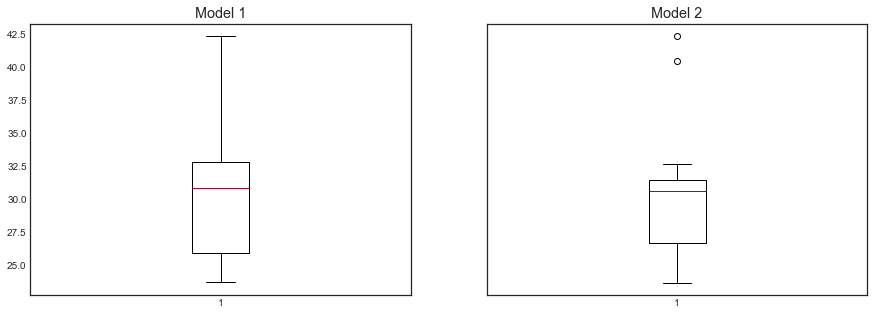

              M1         M2
count  13.000000  13.000000
mean   30.635415  30.732517
std     5.704667   5.493378
min    23.649033  23.594508
25%    25.861410  26.596406
50%    30.785993  30.583279
75%    32.770609  31.407075
max    42.370164  42.366956


In [33]:
f, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

ax[0].boxplot(mse1)
ax[1].boxplot(mse2)

ax[0].set_title('Model 1')
ax[1].set_title('Model 2')

plt.show()

print(pd.DataFrame({'M1': mse1, 'M2': mse2}).describe())

In [100]:
mdl1 = sm.OLS(y, X[:,0:2]).fit()
mdl2 = sm.OLS(y, X).fit()

data_test = generate_sample(500, 999)

pred1 = mdl1.predict(data_test.iloc[:,1:3].values)
pred2 = mdl2.predict(data_test.iloc[:,1:].values)

mse1 = ((data_test['y'] - pred1)**2).mean()
mse2 = ((data_test['y'] - pred2)**2).mean()

In [101]:
print(mse1)
print(mse2)

32.91079243251356
33.214923683358165


## Overfitting and Feature selection

### A word of warning

In the previous example, the variables in the matrix $\boldsymbol{K}$ were not correlated with each other or the other variables by construction. Nevertheless, due to randomness / luck / misfortune, $\boldsymbol{k}_2$ was already significant in the regression using the full sample.

Such spurious relationships - relationships that only hold in-sample, but not out-of-sample - are very common in general. Furthermore, some variables may provide some information about the probability of default, but the information content will be too low if other aspects of the variable, which will distort your performance, are taken into account. Think about how many different ratio of balance sheet, P&L and cash flow items you could create.

*But how can you decide if a variable is useful or not, especially with respect to the story of the case study?*

1. economic reasoning
2. economic reasoning
3. economic reasoning

Of course, that is not all - you can for example:
* Evaluate each variable of interest alone w.r.t. its prediction power of defaults. 
    + Nevertheless, remember that there some variables may not be directly important, but only in combination with another variable. 
    + Hence only looking at p-values and / or a Gini coefficient is not enough, especially in an univariate context.
    + Try to visualize the differences in the distribution of the variables depending on wheather they default or not.
* Identify variables that include nearly the same information - if they include the same information, you will not need both of them - use one or combination (e.g. Dimension Reduction Methods like PCA)
* Use some machine learning techniques, for example:
 + Stepwise regressions (Forward, Backward, Hybrid)
 + Regularized regressions models (e.g. logit regressions with L1 / L2 penalty called Lasso / Ridge Regressions too)
 + Tree based models like random forests

In [34]:
path = 'C:/Users/schmi/OneDrive/Uni/Teaching/Applied_RM/Sessions/'

df = pd.read_csv(path + 'german_credit_data.csv', sep=',', index_col=0)
df = df.rename(columns={'Credit amount': 'Credit_amount',
                       'Saving accounts': 'Saving_accounts',
                       'Checking account': 'Checking_account'})
df = df.rename(columns={'Risk': 'Risky'})
df.Risky = df.Risky.replace(['good', 'bad'], [False, True])
df.Job = df.Job.replace([0,1,2,3],['unemp/-skilled / non-resident', '-skilled', 
                                   'skilled', '+skilled / selfemp'])
df.Credit_amount = np.round(df.Credit_amount / 1.95583,2)
df.Checking_account = df.Checking_account.replace(np.nan,'Unknown')
df.Saving_accounts = df.Saving_accounts.replace(np.nan,'Unknown')
df.head()

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risky
0,67,male,skilled,own,Unknown,little,597.70,6,radio/TV,False
1,22,female,skilled,own,little,moderate,3042.70,48,radio/TV,True
2,49,male,-skilled,own,little,Unknown,1071.67,12,education,False
3,45,male,skilled,free,little,little,4030.00,42,furniture/equipment,False
4,53,male,skilled,free,little,little,2489.99,24,car,True


Unknown     394
little      274
moderate    269
rich         63
Name: Checking_account, dtype: int64


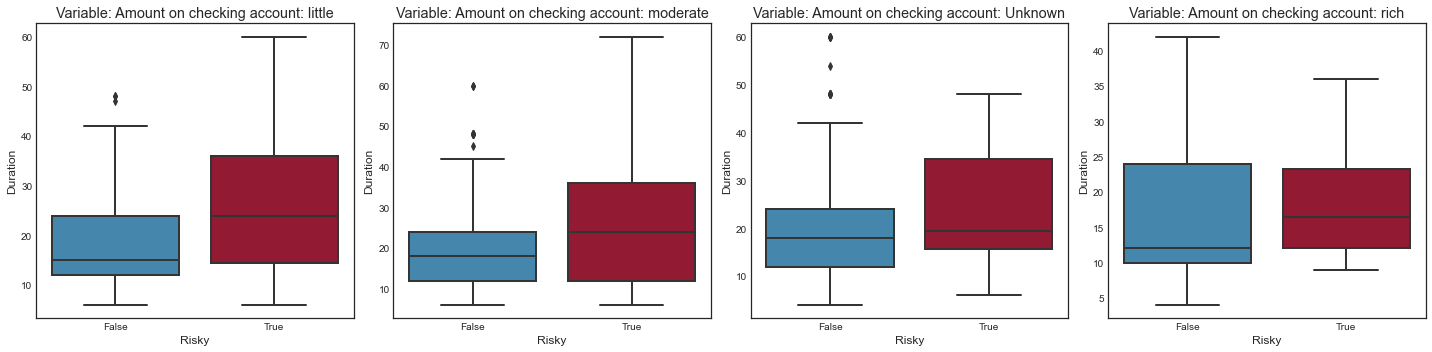

In [35]:
g = list(df.Checking_account.unique())
fig, axes = plt.subplots(1,len(g), figsize=(len(g)*5,5))
row = 0

for i in df.Checking_account.unique():   
    sns.boxplot(x=df.Risky, y=df.loc[df.Checking_account==i, 'Duration'], whis=1.5, ax=axes[row])
    axes[row].set_title("Variable: Amount on checking account: {}".format(i))
    row += 1
    
fig.tight_layout()

print(df.Checking_account.value_counts())

In [37]:
catvar = [i for i in list(df.columns) if df[i].dtype=='O']
catvar

for i in catvar:
    tmp1 = pd.crosstab(df['Risky'], df[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(True, ascending=False)
    tmp2 = pd.crosstab(df['Risky'], df[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  Sex
---------------------------------------------------
        False   True  N_False  N_True    N  N_Perc
Sex                                               
female  64.84  35.16      201     109  310    31.0
male    72.32  27.68      499     191  690    69.0

Variable:  Job
---------------------------------------------------
                               False   True  N_False  N_True    N  N_Perc
Job                                                                      
+skilled / selfemp             65.54  34.46       97      51  148    14.8
unemp/-skilled / non-resident  68.18  31.82       15       7   22     2.2
skilled                        70.48  29.52      444     186  630    63.0
-skilled                       72.00  28.00      144      56  200    20.0

Variable:  Housing
---------------------------------------------------
         False   True  N_False  N_True    N  N_Perc
Housing                                            
free     59.26  40.74       64      44  1

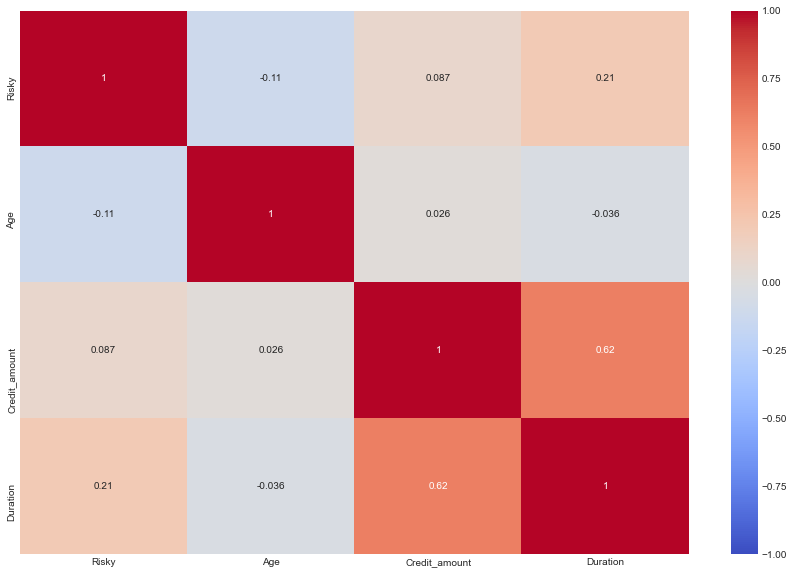

In [105]:
# Pearson vs. Spearman

numvar = [i for i in list(df.columns) if df[i].dtype in ['float64','int64']]

boolvar = 'Risky'

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[[boolvar]+numvar].corr(method='spearman'), 
            annot=True,cmap="coolwarm",
            vmin=-1, vmax=1, ax=ax);

### Example: A small tree

#### The tree in a figure

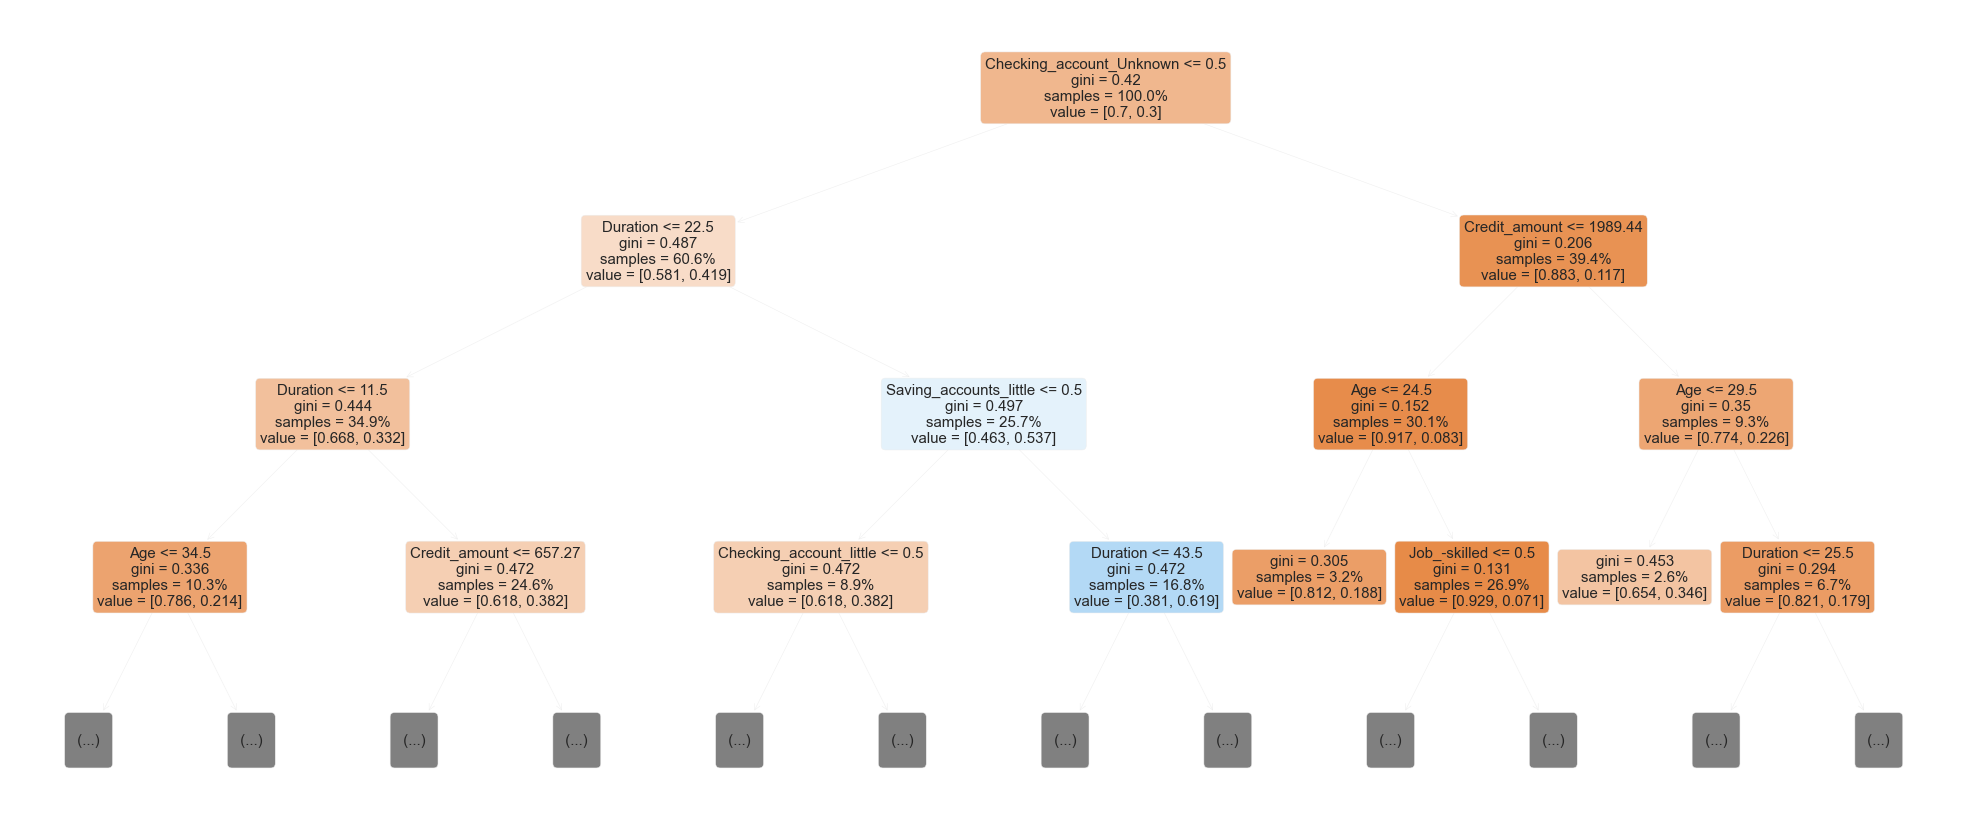

In [106]:
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
import graphviz

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'

y = df.Risky.values
cols_x = ['Age', 'Credit_amount', 'Duration']
cols_c = ['Sex','Job','Housing','Saving_accounts','Checking_account', 'Purpose']

X1 = df[cols_x]
X2 = df[cols_c]

XET = pd.concat([X1, pd.get_dummies(X2)], axis=1)
cols = XET.columns

mdl = tree.DecisionTreeClassifier(criterion='gini', random_state=100, 
                                  max_features=None, 
                                  min_samples_split=50,
                                  min_samples_leaf=25, max_depth=10)

mdl.fit(XET,y)
p = mdl.predict_proba(XET)[:,1]

fig, ax = plt.subplots(figsize=(35, 15))
tree.plot_tree(mdl, max_depth=3, fontsize=15, feature_names=cols, proportion=True,
               filled=True, rounded=True)
plt.show()

#### The tree exported as a text

In [107]:
print(tree.export_text(mdl, feature_names=list(cols), spacing=3, decimals=1, show_weights=True))

|--- Checking_account_Unknown <= 0.5
|   |--- Duration <= 22.5
|   |   |--- Duration <= 11.5
|   |   |   |--- Age <= 34.5
|   |   |   |   |--- weights: [31.0, 16.0] class: False
|   |   |   |--- Age >  34.5
|   |   |   |   |--- Age <= 43.5
|   |   |   |   |   |--- weights: [25.0, 1.0] class: False
|   |   |   |   |--- Age >  43.5
|   |   |   |   |   |--- weights: [25.0, 5.0] class: False
|   |   |--- Duration >  11.5
|   |   |   |--- Credit_amount <= 657.3
|   |   |   |   |--- Checking_account_moderate <= 0.5
|   |   |   |   |   |--- weights: [16.0, 28.0] class: True
|   |   |   |   |--- Checking_account_moderate >  0.5
|   |   |   |   |   |--- weights: [17.0, 14.0] class: False
|   |   |   |--- Credit_amount >  657.3
|   |   |   |   |--- Housing_own <= 0.5
|   |   |   |   |   |--- Duration <= 15.5
|   |   |   |   |   |   |--- weights: [18.0, 10.0] class: False
|   |   |   |   |   |--- Duration >  15.5
|   |   |   |   |   |   |--- weights: [13.0, 14.0] class: True
|   |   |   |   |--- 

#### Variable importance visualized

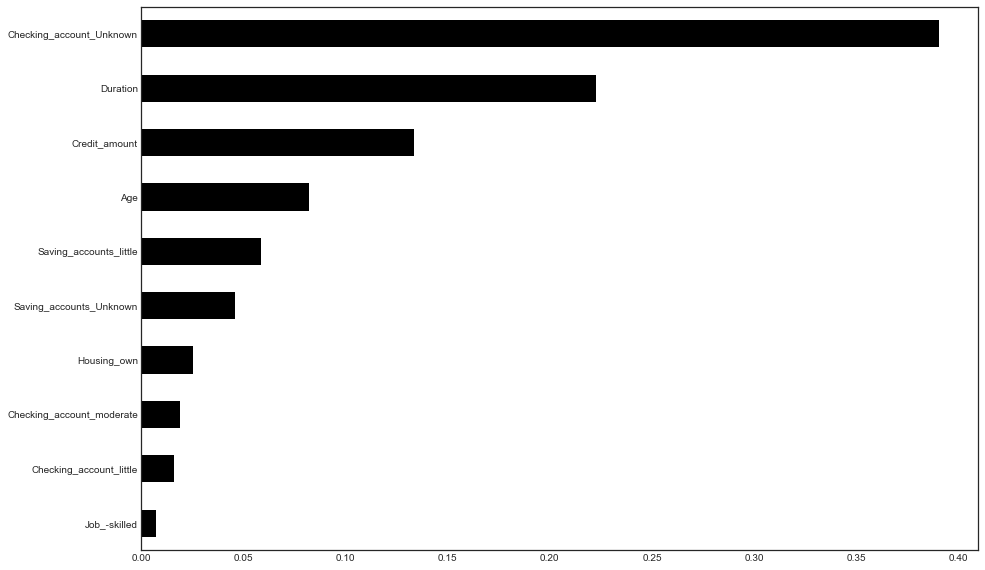

In [108]:
imp = pd.Series(mdl.feature_importances_,index=cols).sort_values(ascending=False)
plt.figure(figsize=(15,10))
imp[imp>0].plot.barh(color="black").invert_yaxis();

#### Gini and AUC of the tree

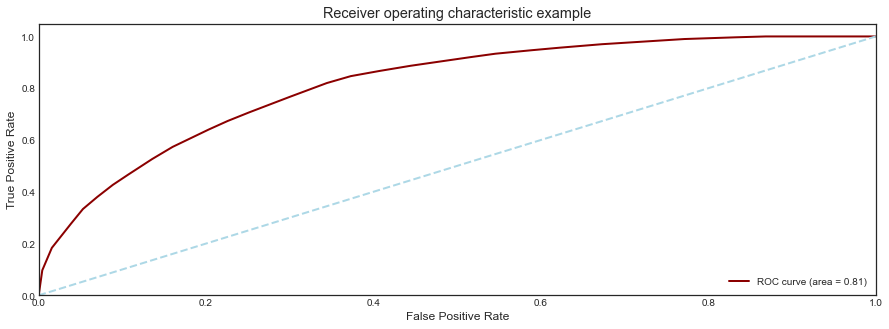

AUC:   0.8143857142857144
GINI:  0.6287714285714288


In [109]:
pdpred = mdl.predict_proba(XET)[:,1]

fpr, tpr, thresholds = sk.metrics.roc_curve(df.Risky, pdpred)
auc = metrics.auc(fpr, tpr)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print('AUC:  ',auc)
print('GINI: ', 2*auc -1)

**Question**

Lets estimate another tree, but now using a train-test sample split (2/3 and 1/3) and different settings to build the tree.

What do you expect will happen with the Gini coeffient out of sample?

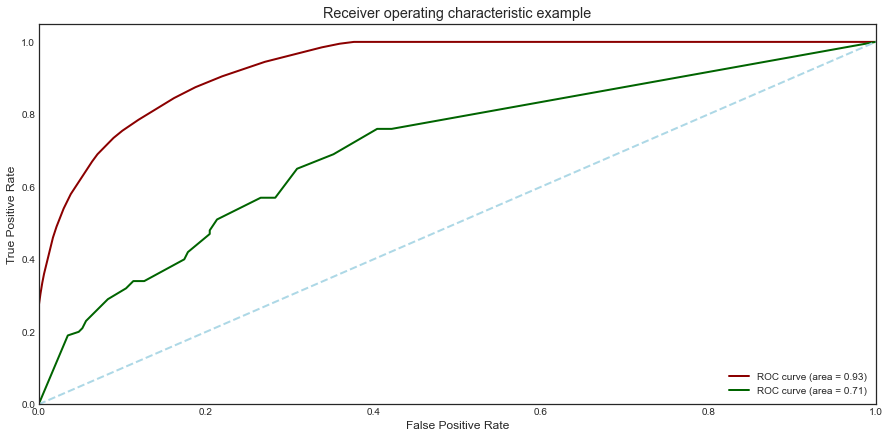

In sample: 
AUC:   0.9336010638297872
GINI:  0.8672021276595745

Out of sample
AUC:   0.7068478260869566
GINI:  0.41369565217391324


In [110]:
from sklearn.model_selection import train_test_split
ids_train, ids_test, d_train, d_test = train_test_split(df.index, df.Risky, test_size=0.33, random_state=2020)

mdl = tree.DecisionTreeClassifier(criterion='gini', random_state=100, 
                                  max_features=None, 
                                  min_samples_split=10,
                                  min_samples_leaf=5, max_depth=100)

mdl.fit(XET.loc[ids_train],d_train)

p = mdl.predict_proba(XET.loc[ids_train])[:,1]
fpr, tpr, thresholds = sk.metrics.roc_curve(d_train.loc[ids_train], p)
auc = metrics.auc(fpr, tpr)

p2 = mdl.predict_proba(XET.loc[ids_test])[:,1]
fpr2, tpr2, thresholds2 = sk.metrics.roc_curve(d_test.loc[ids_test], p2)
auc2 = metrics.auc(fpr2, tpr2)

fig, axes = plt.subplots(figsize=(15,7))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred', lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr2, tpr2, color='darkgreen', lw=lw, label='ROC curve (area = %0.2f)' % auc2)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("In sample: ")
print('AUC:  ',auc)
print('GINI: ', 2*auc -1)
print()
print("Out of sample")
print('AUC:  ',auc2)
print('GINI: ', 2*auc2 -1)

## Other suitable methods you can use in your case study

Logistic regressions aren't without any alternative. There are many interesting candidates you could try out, but I will be very happy with a logistic regressions. Don't forget the story of the case study and don't assume that the people you have to explain your approach, like the CRO, are machine learning experts. A CRO will want to understand what you have done and simply copy some code you found in the world wide web to estimate a fancy super model without understanding it will not be enough. Furthermore, many people in a bank will want to be able to understand the effect of X on Y - and many people have problems to comprehend non-linear relationships. Furthermore, you will prefer a robust model and given the number of observations in your dataset finding a well out-of-sample performing logistic regression model will be difficult enough.

Due to that, I will not go into any details about the below listed methods. Nevertheless, such models are very interesting on their own and if you are able to explain me those models and provide me with an economic reasoning of your results, you are welcome to use them of course.

* Ensambling methods (Boosting and Bagging)
* Generalized Additive Models
* Support Vector and Gradient Boosting Machines
* Random Forests and other tree based models
* Neural networks
* ...

# The case study (break out rooms)